In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']


In [8]:
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']



In [9]:
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']


In [10]:
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [15]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)


In [16]:
X_train_reshape.shape

(60000, 784)

In [17]:
X_train_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
X_test_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)


In [20]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ploting the hand written image randomly

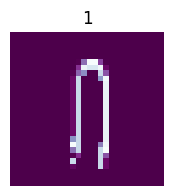

In [22]:
def plot_random_digit():
  random_index = np.random.randint(0,X_train.shape[0])
  plt.imshow(X_train[random_index], cmap='BuPu_r')
  plt.title(y_train[random_index])
  plt.axis('off')
plt.figure(figsize=[2,2])
plot_random_digit()

## performing PCA to 15 components.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)



In [24]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,603.287399,-265.967214,29.543061,-322.432368,297.645285,124.893170,-101.720542,-40.297914,381.734852,-188.109344,114.528681,36.534668,-90.869852,-32.243678,-386.993615
1,298.508146,-97.544840,53.099782,-549.039246,42.397318,-313.927232,-219.937563,243.950191,253.644113,261.889382,-270.533379,290.892544,-30.415142,-57.069735,-75.149413
2,-425.622144,646.150454,433.612355,-152.571192,162.642922,195.939546,43.418326,-399.503005,346.664479,-130.076217,197.830692,84.402529,-41.328040,-64.623526,100.486991
3,-343.828556,100.668094,-415.923943,-8.475174,-103.484823,152.578252,-97.497664,-270.066993,-17.804395,158.266034,12.733745,17.746770,19.096854,-139.514198,53.569238
4,-96.056326,3.559588,-516.641177,125.599453,22.231974,80.837435,69.493216,-86.728037,158.238030,180.438062,-91.416476,-87.620183,41.351260,-159.128365,-193.153712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-210.913976,384.412724,741.318221,144.939150,-227.953532,1.579966,337.754906,56.457964,-338.209234,-4.513385,-10.708174,238.920676,264.808029,-41.986497,321.930469
59996,-411.839793,45.667524,127.141110,-205.794234,-377.403219,-242.377588,121.624115,-321.743168,151.314373,65.740158,-133.338091,119.193283,175.891270,-173.234120,28.824787
59997,-568.865941,5.946216,470.638560,-351.496483,-287.225204,-116.167740,75.689234,-222.845090,148.848749,-165.771374,22.541491,70.982987,-221.106093,-33.868865,29.988378
59998,771.741991,-105.780696,296.496910,460.848219,-471.924676,-82.685441,-108.217841,-84.219080,72.066942,89.788899,96.524920,21.705032,-64.868279,63.204243,318.735881


In [25]:
x_test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,279.360134,-604.631004,-176.073276,-322.225593,749.389765,-78.054498,196.939724,238.555007,455.713078,-307.654032,323.689405,157.597686,646.224706,682.575249,140.626748
1,68.689922,-153.316988,-59.930180,-475.445625,305.787282,-400.528546,21.639737,303.846785,470.932860,-30.184616,-105.643198,447.143900,96.436968,128.513981,26.565315
2,-173.920108,-101.756176,-158.922336,139.186436,564.146400,-69.060411,138.511439,398.207305,681.020286,251.495478,123.623540,-157.539532,-215.771910,-103.894986,-128.769536
3,-258.215994,62.586130,-502.917200,-5.869998,390.682659,14.063040,-170.720838,109.850678,242.457728,-162.785177,106.441797,-169.643405,38.131619,-59.819052,264.698484
4,-145.295064,51.348972,-517.376405,123.800981,140.382610,106.626344,156.054846,-316.286978,245.377385,152.512389,55.693063,-78.729877,-39.896679,-132.271321,-131.890509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.943984,102.682920,-382.820358,274.521755,-39.783433,-123.453797,234.997119,195.905859,48.835067,-77.600220,147.572936,-49.653665,2.125137,-150.398970,-94.513670
9996,-508.251358,-177.757937,-130.086345,23.491902,-105.807858,139.527481,-38.968989,-70.699439,89.507146,359.257283,-86.194952,-137.650346,-187.369881,-26.504978,-205.293512
9997,-541.203948,27.851760,55.254287,-84.475976,292.476126,185.030118,-75.176450,51.767732,85.828541,-1.772864,61.756172,50.731423,119.652551,-201.091791,126.173529
9998,648.876450,-49.691633,161.243651,-162.888894,-336.361787,37.133376,260.124488,-26.019417,51.292304,134.339687,-125.490799,-403.439616,-58.590071,56.966955,52.771781


# Normalizing  the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train_pca)
transformed_train_data = mm.transform(x_train_pca)
transformed_test_data = mm.transform(x_test_pca)
x_pca_train_trans = pd.DataFrame(transformed_train_data)
x_pca_test_trans = pd.DataFrame(transformed_test_data)

In [27]:
x_pca_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.494385,0.352083,0.393206,0.441501,0.426625,0.469479,0.433482,0.429699,0.481461,0.492621,0.444458,0.487029,0.442225,0.412937,0.466609
std,0.169977,0.137099,0.170133,0.142875,0.128648,0.133337,0.129764,0.135438,0.126769,0.123129,0.129630,0.127496,0.101700,0.116699,0.112738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364023,0.263934,0.253559,0.345208,0.349896,0.369752,0.337729,0.331054,0.395872,0.409722,0.356982,0.400379,0.376546,0.330703,0.389617
50%,0.503940,0.335521,0.385296,0.443892,0.429619,0.464232,0.432739,0.423709,0.479709,0.494354,0.446057,0.485093,0.437884,0.408475,0.462590
75%,0.618434,0.405256,0.525669,0.535900,0.508288,0.568329,0.527408,0.521566,0.561083,0.576602,0.533747,0.572131,0.503117,0.490499,0.539556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## • K-NN Classifier model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_pca, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [29]:
rcv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [30]:
rcv_knn.best_score_

0.95655

In [31]:
finalmodel_knn_mnist = knn_pca.set_params(**rcv_knn.best_params_)
finalmodel_knn_mnist.fit(x_pca_train_trans, y_train)
knnpreds_mnist = finalmodel_knn_mnist.predict(x_pca_test_trans)

## Evaluation (KNN)

Precision: 0.9081198714937265
Recall: 0.9049999999999999
F1-score: 0.9044754970001007
Confusion Matrix:
[[797 162   3  13   3   0   1   3  13   5]
 [ 14 959   0   8   5   0   0   1  10   3]
 [  3   1 984   2   0   5   3   0   2   0]
 [ 13  10   1 895  27  27   5  18   3   1]
 [  0   1   0   5 960  18   2   3   5   6]
 [  0   0   0  11  88 893   3   1   2   2]
 [  1   4   0  17  29  11 887  38   0  13]
 [  9   4   1  29  27   6 101 781   1  41]
 [ 19   9   1   2   2   3   4   0 955   5]
 [  4   9   0   0  15   3   9   1  20 939]]
AUC : 0.97572557


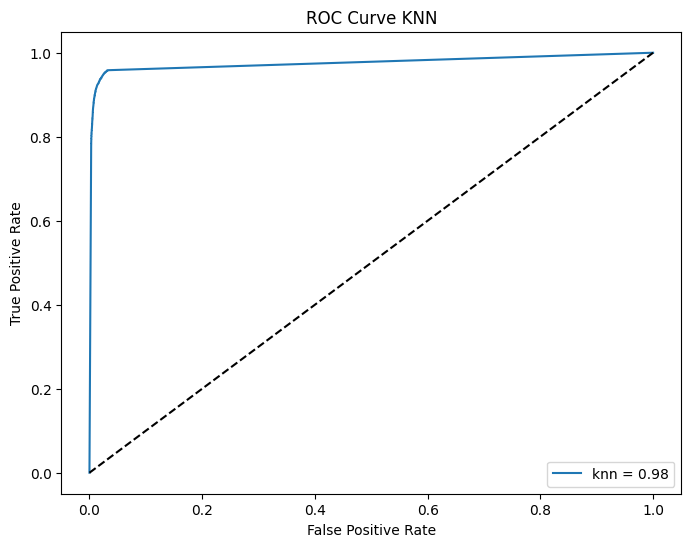

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_mnist,average = 'macro')
recall = recall_score(y_test, knnpreds_mnist,average = 'macro')
f1 = f1_score(y_test, knnpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#calculate AUC

from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_knn = finalmodel_knn_mnist.predict_proba(x_pca_test_trans)
fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),predict_proba_knn.ravel())
auc = auc(fpr_knn,tpr_knn)

print("AUC :", auc)

# plotting ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'knn = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc='lower right')
plt.show()

## DECISION TREES

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }

skf = StratifiedKFold(n_splits = 5)

rcv_dt = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_dt.fit(x_pca_train_trans, y_train)

rcv_dt.best_score_


0.88985

In [51]:
rcv_dt.best_params_

{'splitter': 'best', 'max_depth': 24, 'criterion': 'gini'}

In [52]:
finalmodel_dt_mnist = model.set_params(**rcv_dt.best_params_)
finalmodel_dt_mnist.fit(x_pca_train_trans, y_train)
dtpreds_mnist = finalmodel_dt_mnist.predict(x_pca_test_trans)

## EVALUATION (DECISION TREE)

Precision: 0.8124865201424749
Recall: 0.8117999999999999
F1-score: 0.8107754421743998
Confusion Matrix:
[[726 158  11  27   5   7   5   6  38  17]
 [ 62 825   9  31   8  15   5   4  24  17]
 [  6   4 933   8   1  22   7   7   4   8]
 [ 10   6  10 800  26  35  33  55  14  11]
 [  0   1   3  32 850  47  15   9  18  25]
 [  4  10   4  16 100 825   5   7  12  17]
 [  5   5   6  57  26  25 791  65   5  15]
 [  6  13   8  44  30   9 134 664  18  74]
 [ 42  23  15   5   5  16   5   3 869  17]
 [ 12  41   6   4  13   8  10   6  65 835]]
AUC: 0.8935150149999999


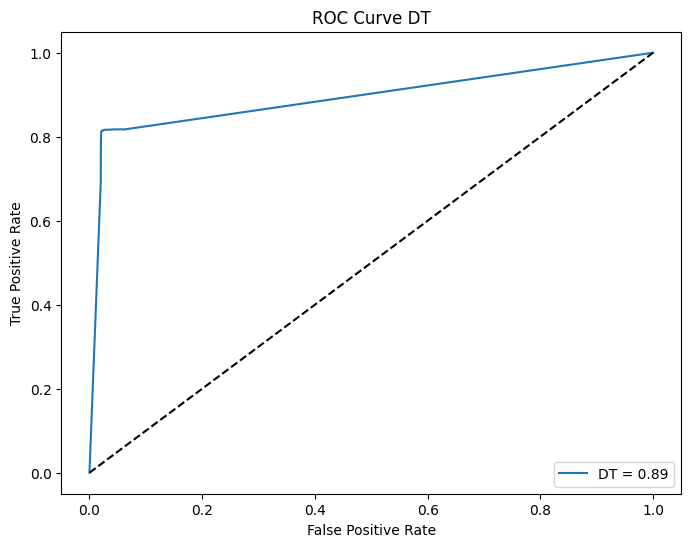

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dtpreds_mnist,average = 'macro')
recall = recall_score(y_test, dtpreds_mnist,average = 'macro')
f1 = f1_score(y_test, dtpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,dtpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_dt =  finalmodel_dt_mnist.predict_proba(x_pca_test_trans)
fpr_dt,tpr_dt,thersholds_dt = roc_curve(y_test_bin.ravel(),predict_proba_dt.ravel())
auc = auc(fpr_dt,tpr_dt)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend(loc='lower right')
plt.show()


## RANDOM FOREST

# On non- normalized data

Precision: 0.8959561696814354
Recall: 0.8926999999999999
F1-score: 0.8920764827910299
Confusion Matrix:
[[800 147   2  17   6   0   2   2  16   8]
 [ 21 927   0  20   5   4   0   1  14   8]
 [  4   1 985   2   0   5   1   1   1   0]
 [  7   9   1 918  17  16   5  23   4   0]
 [  0   1   0  20 936  24   2   4   8   5]
 [  0   1   0  11 111 866   2   2   5   2]
 [  3   5   0  36  20  24 867  27   4  14]
 [  6  11   1  41  26   6 109 757   6  37]
 [ 16   7   1   1   3   5   3   0 963   1]
 [  4   6   0   1  15   0   7   1  58 908]]
AUC: 0.9926116766666666


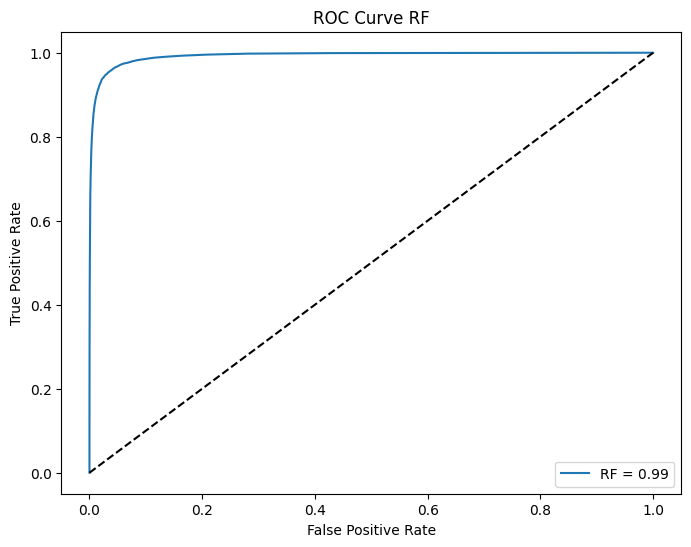

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_train_pca, y_train)
rfpreds_mnist = rf_mnist.predict(x_test_pca)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_test_pca)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# On Normalized data

Precision: 0.8953706918067823
Recall: 0.8924000000000001
F1-score: 0.8917577203905248
Confusion Matrix:
[[793 147   3  22   7   0   2   4  18   4]
 [ 18 928   1  21   4   3   0   1  15   9]
 [  4   2 985   2   0   5   1   0   1   0]
 [  7   9   1 913  14  16   5  29   5   1]
 [  0   1   0  17 933  26   4   3   9   7]
 [  0   1   0  10 113 863   2   3   6   2]
 [  3   6   1  38  16  24 867  23   2  20]
 [  8  11   1  33  20   4 107 769   6  41]
 [ 14   7   1   1   2   4   2   0 967   2]
 [  5   8   0   0  14   0   6   2  59 906]]
AUC: 0.9923593150000001


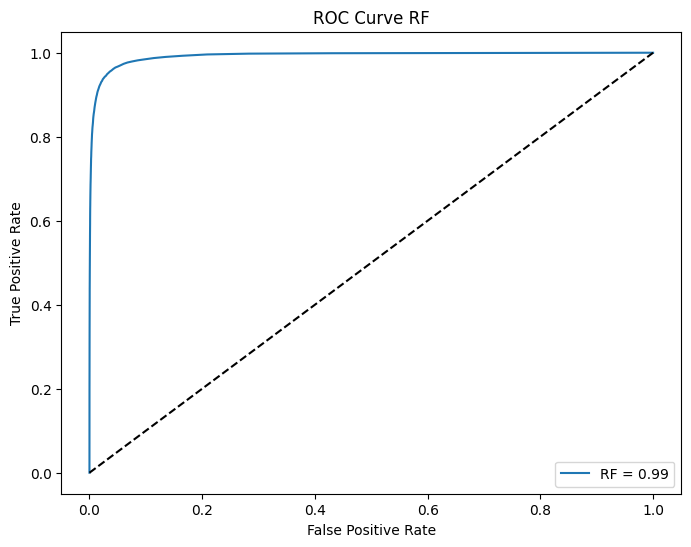

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_pca_train_trans, y_train)
rfpreds_mnist = rf_mnist.predict(x_pca_test_trans)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# OPTIMIZED MODEL

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rf_mnist = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':['sqrt', 'log2', None]
          # 'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(rf_mnist, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(1, 10)},
                   scoring='accuracy')

In [40]:
rcv.best_params_

{'n_estimators': 9, 'max_features': 'sqrt', 'criterion': 'gini'}

In [41]:
rcv.best_score_

0.9374666666666667

In [42]:
finalmodel_rf = rf_mnist.set_params(**rcv.best_params_)
finalmodel_rf.fit(x_pca_train_trans, y_train)
rfpreds_mnist = finalmodel_rf.predict(x_pca_test_trans)

Precision: 0.8713416075187699
Recall: 0.8680999999999999
F1-score: 0.8676666536154152
Confusion Matrix:
[[797 136   5  26   5   0   3   4  20   4]
 [ 47 892   2  29   4   0   2   1  15   8]
 [  6   2 974   4   0   6   3   3   1   1]
 [ 14  11   5 890  18  18  10  29   3   2]
 [  0   2   0  36 910  32   2   3   6   9]
 [  1   3   2  21 112 843   4   3   6   5]
 [  3   5   5  68  14  18 841  30   4  12]
 [ 11  12   1  50  26   5 119 729   5  42]
 [ 29  20   4   5   2  10   4   0 924   2]
 [  9  16   0   2  15   1   5   1  70 881]]
AUC: 0.9788192866666667


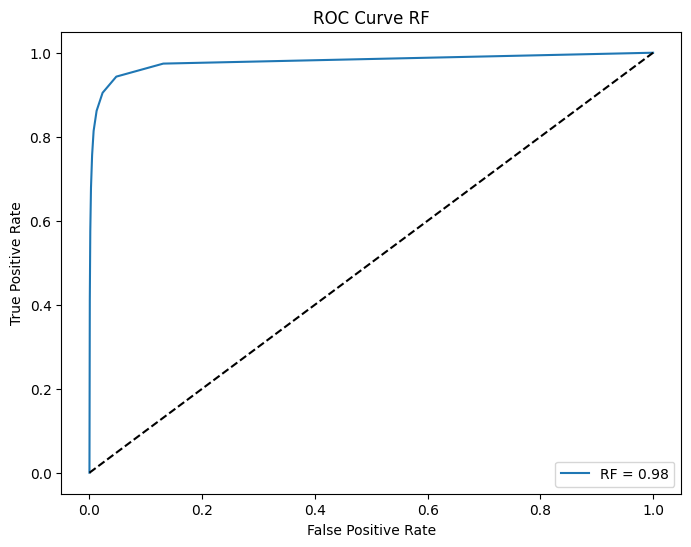

In [43]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = finalmodel_rf.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

Precision: 0.7869589484330245
Recall: 0.7835
F1-score: 0.7819874617708026
Confusion Matrix:
[[601 237  19  48  11   0   2  13  61   8]
 [ 17 776   8  96  18   6   0   2  60  17]
 [  9   2 976   5   0   5   1   0   1   1]
 [ 18  10   3 790  37  19  31  92   0   0]
 [  0   1   1  18 872  42   2  22  32  10]
 [  0   1   9  33 179 736   5  19  13   5]
 [  6   7  50  21  25  40 785  50   3  13]
 [  8  16   7  50  35   1 193 677   2  11]
 [116  24  20   3   3   6   3   1 817   7]
 [ 25  12   3   0  30   0  13  10 102 805]]
AUC: 0.9735667022222223


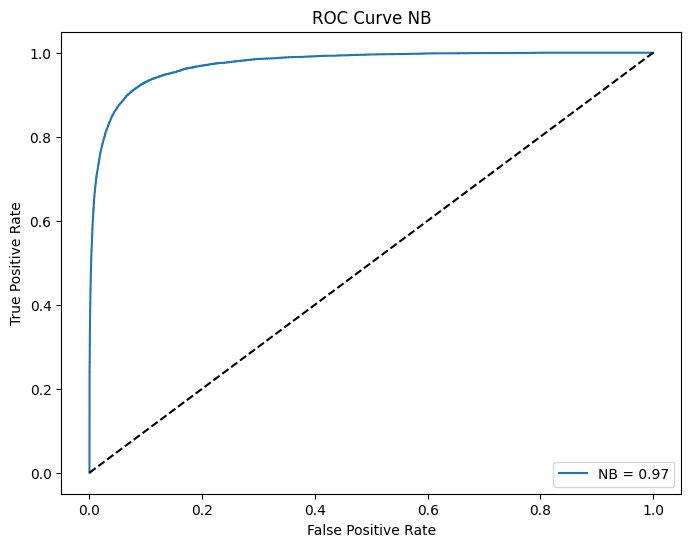

In [44]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_pca_train_trans, y_train)

predictions_nb = naive_bayes.predict(x_pca_test_trans)

## Evaluation

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_nb,average = 'macro')
recall = recall_score(y_test, predictions_nb,average = 'macro')
f1 = f1_score(y_test, predictions_nb,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_nb)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = naive_bayes.predict_proba(x_pca_test_trans)
fpr_nb,tpr_nb,thersholds_nb = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_nb,tpr_nb)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend(loc='lower right')
plt.show()


## SVM

Precision: 0.9183068813711414
Recall: 0.9157
F1-score: 0.9153065142195181
Confusion Matrix:
[[828 128   1  16   7   0   0   4  13   3]
 [ 13 953   0  12   4   2   2   1   8   5]
 [  3   0 985   2   1   3   1   1   2   2]
 [  8   6   1 913  17  19   7  27   2   0]
 [  0   1   0   8 961  14   3   0   6   7]
 [  0   0   0   7 104 881   3   1   4   0]
 [  1   2   1  14  22  24 912   9   1  14]
 [ 18   6   0  18  20   3  83 809   3  40]
 [  8   2   2   1   2   3   1   0 975   6]
 [  3  11   0   0   8   0   5   0  33 940]]
AUC: 0.9735667022222223


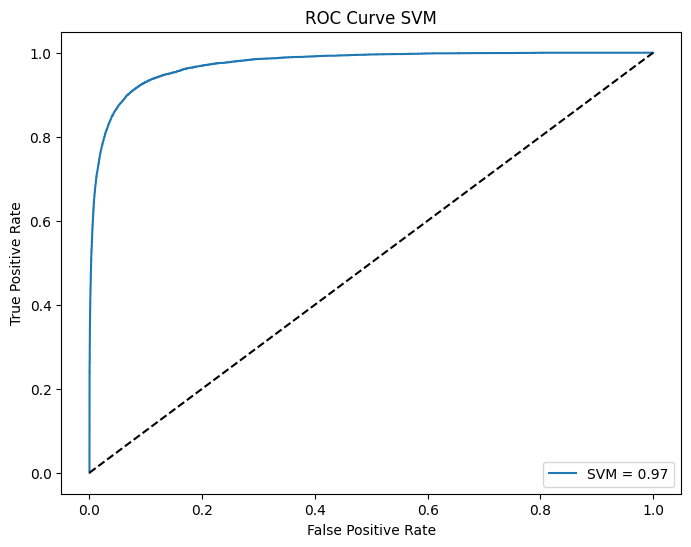

In [56]:
from sklearn.svm import SVC

svc_mnist= SVC(probability = True)
svc_mnist.fit(x_pca_train_trans, y_train)
predictions_svc = svc_mnist.predict(x_pca_test_trans)

## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_svc,average = 'macro')
recall = recall_score(y_test, predictions_svc,average = 'macro')
f1 = f1_score(y_test, predictions_svc,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_svc = svc_mnist.predict_proba(x_pca_test_trans)
fpr_svc,tpr_svc,thersholds_svc = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_svc,tpr_svc)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVM = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc='lower right')
plt.show()